<h1>When S<sub>baggage</sub> = 0.01 and S<sub>gains</sub> = .1 and m (change_rate) = 100</h1>

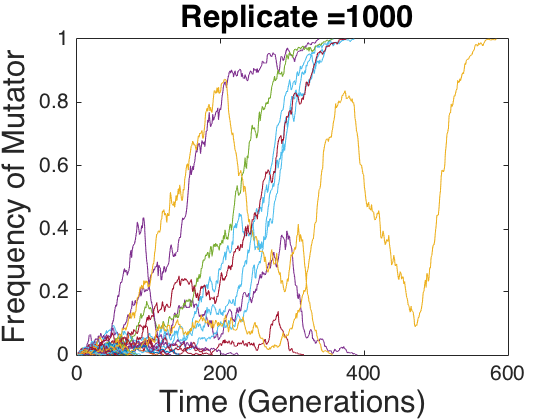

In [1]:
%model parameters
%General Parameters
N = 1000; %population size
num_loci = 1000;%number of loci in accessory genome
m = 100;%number of gens btwn environmental changes
mu_1 = 10^(-7);%mutation rate (KO/ {gene/gen})
mu_2 = 100*mu_1;
rev_mut = .001;
num_essential = round(.25*num_loci);

%scalar values of some things
s_baggage = .01;%costs
s_gains = .1;%weights
frac_needed_scalar = .1; %fraction_needed

%vector values of the same things things
% weights = .1 * ones(1, num_loci);%vector of length "num_loci" denoting fitness contribution
%             %of each functional locus when needed
% costs = .001 * ones(1, num_loci);%vector denoting fitness cost of functional loci when not needed
% fraction_needed = .1 * ones(1, num_loci);%vector denoting fraction of environments each locus is needed

%simulation parameters
num_reps = 1000; %number of replicate runs
time = 2500;%number of generations to run simulation
%initialize data structures
is_fixed = zeros(1, num_reps);
stop_time = zeros(1, num_reps);
freq_mutator = nan(num_reps, time);





%for the figure
close all;
figure(1);
fontSize = 15;

change_rate = m;
for j = 1:num_reps
    pop = [N-1,ones(1,num_loci),mu_1;1,ones(1,num_loci),mu_2]; %starts all individuals with all functional loci
    rand_vect = rand(1,num_loci); %initializes with a random environment
    env = rand_vect<=frac_needed_scalar;
    freq_mutator(j,1) = sum(pop(:,1).*(pop(:,end)==mu_2))/N;
    k=1;
    counter = round((rand)*(change_rate - 1));
    point_in_time = 0;
    
    while k == 1
        
        counter = counter + 1;
        point_in_time = point_in_time + 1;
        if mod(counter,change_rate)==0  %determines if environment should change this generation
            rand_vect = rand(1,num_loci); %initializes with a random environment
            env = rand_vect<=frac_needed_scalar; %resets each environment
        end
        
        pop = mutate3(pop, rev_mut, num_essential); %mutate population
        %%%%%%%%%%% deals with extinction %%%%%%%%%%%%%%%%%%%
        if (size(pop,1) == 1) && (isnan(pop(:,2)))
            freq_mutator(j,point_in_time) = 0;
            break
        end
        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
        
        
        fitnesses = compute_fitness3(pop,s_gains,env,s_baggage); %computes fitnesses for each unique genotype
        pop = wright_fisher2(fitnesses); %performs wright_fisher sampling to update population to next generation
        
        %Data Collection and Statistics
        freq_mutator(j,point_in_time) = sum(pop(:,1).*(pop(:,end)==mu_2))/N;
        index = find(m == change_rate);
        
        mu_poly = unique(pop(:, end));
        if length(mu_poly) == 1
            k = 0;
            if mu_poly == mu_1
                is_fixed(index,j) = 0;
                stop_time(index,j)= counter;
            elseif mu_poly == mu_2
                is_fixed(index,j) = 1;
                stop_time(index,j)= counter;
                
            else
                error('Value other than 0 or 1 are not permited')
            end
        end
        
        
        %Graphics
        
        
        
        x2=1:length(freq_mutator);
        y2=freq_mutator;
        plot(x2,y2)
        title([' Replicate =' num2str(j) ], 'FontSize', fontSize);
        ylabel('Frequency of Mutator', 'FontSize', fontSize);
        xlabel('Time (Generations)', 'FontSize', fontSize);
        
    end
    
end
